# Live plot from URL

In [227]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

import pandas as pd

import dateutil.parser


In [228]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:2000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [229]:
def plotter(ax,dat,colname):
    #x=np.linspace(0,1,len(dat)) #replace this with dates
    x=dat['date'].tolist()
    y=dat[colname].tolist()
    #ax.plot(x, y, color)
    ax.plot(x, y)
    fig.canvas.draw()
    
def update(ax,dat,colname):
    #x=np.linspace(0,1,len(dat)) #replace this with dates
    x=dat['date'].tolist()
    y=dat[colname].tolist()
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y=dat[colname].tolist()
            line.set_ydata(y)
    ax.relim()
    ax.autoscale_view(True,True,True)


In [230]:
import urllib.request
import ssl

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

def getDataVar(filename,colnames,base_url):
    response = urllib.request.urlopen(base_url+filename,context=ctx)
    data = response.read()      # a `bytes` object
    text = data.decode('utf-8') 
    TESTDATA=StringIO(text)
    dat = pd.read_csv(TESTDATA, sep=" ",names=colnames)
    #dat = convert_unix_time(dat)
    return dat

In [231]:
#convert to unix time

def convert_unix_time(df):
    col = 'date'
    for row in range(0,len(df.index)):
        date=dat[col].tolist()[row]
        pdate=dateutil.parser.parse(date)
        unixtime=int(time.mktime(pdate.timetuple()))
        df.set_value(row,col,unixtime)
    return df


In [232]:
colnames=['date','O2']
base_url='http://nautilusdataviz.media.mit.edu:8888/files/'
#base_url='https://external.oet.org/science/monitor/'

filenames=['Herc-Depth.samples','Temperature.samples','Salinity.samples']
#filenames=['Herc-Depth.samples','Temperature.samples']

In [302]:
# get initial data
index=0

for index in range(0,len(filenames)):
    filename=filenames[index]
    dat= getDataVar(filename,colnames,base_url)
    dat=convert_unix_time(dat)
    print(index)

    # convert to unix time
    plotter(ax[index],dat,'O2')

    logfile='log_'+filename
    #print(logfile)
    dat.to_csv(logfile, sep=' ', header=False, index=False)


0
1
2


In [305]:
# update data

for index in range(0,len(filenames)):
    filename=filenames[index]
    dat= getDataVar(filename,colnames,base_url)
    dat=convert_unix_time(dat)
    update(ax[index],dat,'O2')
    
    
    logfile='log_'+filename

    # check to see if we already have this data
    lt=pd.read_csv(logfile,delimiter=' ',names=['date','O2'])
    
    # what's the last timestamp in the log file?
    lt1=lt['date'][len(lt.index)-1]

    # what's the last timestamp in this series?    
    dat1=dat['date'][len(dat.index)-1]
    
    
    # if we don't already have the data, log it:
    if (dat1 !=lt1):
        dat.to_csv(logfile, sep=' ', mode='a', header=False, index=False)
        print("logged: "+logfile)
    

logged: log_Herc-Depth.samples
logged: log_Temperature.samples
logged: log_Salinity.samples


<IPython.core.display.Javascript object>


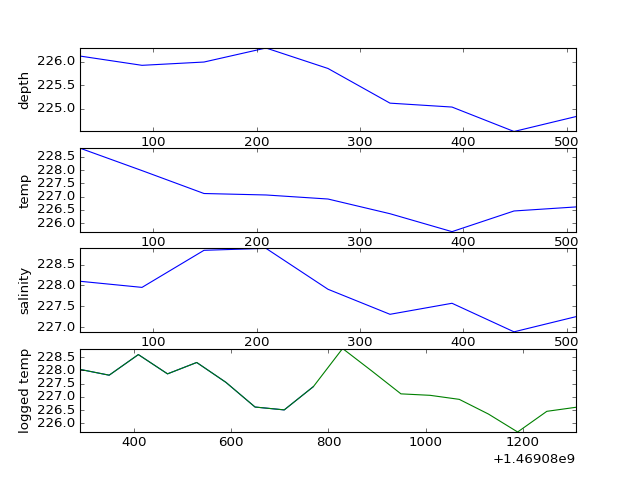

In [301]:
fig,ax = plt.subplots(4)

ax[0].set_ylabel('depth')
ax[1].set_ylabel('temp')
ax[2].set_ylabel('salinity')
ax[3].set_ylabel('logged temp')

In [306]:
lt=pd.read_csv('log_Temperature.samples',delimiter=' ',names=['date','O2'])
x=lt['date'].tolist()
y=lt['O2'].tolist()
ax[3].plot(x,y)
ax[3].relim()
ax[3].autoscale_view(True,True,True)